In [ ]:
from keras.models import load_model
import tensorflow as tf


Load the MNIST Model -1 

In [ ]:
import tarfile
my_tar = tarfile.open('mnist.tar.gz')
my_tar.extractall()
my_tar.close()

Load MNIST MODEL -2

In [ ]:
import tarfile
my_tar = tarfile.open('mnist_v1.tar.gz')
my_tar.extractall()
my_tar.close()

In [ ]:
!ls saved_model/my_model

assets	saved_model.pb	variables


In [ ]:
model_v1 = tf.keras.models.load_model('saved_model/my_model')

In [ ]:
model_v1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        102464    
                                                        

In [ ]:
!ls saved_model_v2/

my_model_v2


In [ ]:
!ls saved_model_v2/my_model_v2/

assets	saved_model.pb	variables


In [ ]:
import warnings
warnings.filterwarnings("ignore")
model_v2 = tf.keras.models.load_model('saved_model_v2/my_model_v2')

In [ ]:
model_v2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        1664      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       112       
 ormalization)                                                   
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        102464    
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 64)       112       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                      

In [ ]:
!pip install -q streamlit

In [ ]:
!pip install -q pyngrok

In [ ]:
!pip install -q streamlit_ace

REFERENCE: https://www.analyticsvidhya.com/blog/2020/12/deploying-machine-learning-models-using-streamlit-an-introductory-guide-to-model-deployment/

In [ ]:
import pandas as pd
import streamlit as st

In [ ]:
test_data = pd.read_csv("test.csv")

In [ ]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_data.shape

(28000, 784)

In [ ]:
test_data['pixel1'].value_counts()

0    28000
Name: pixel1, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def image_show(X,idx):
  plt.figure(figsize=(7,7))
  grid_data = X.iloc[idx].to_numpy().reshape(28,28)
  plt.imshow(grid_data,interpolation=None,cmap='afmhot')
  plt.show()

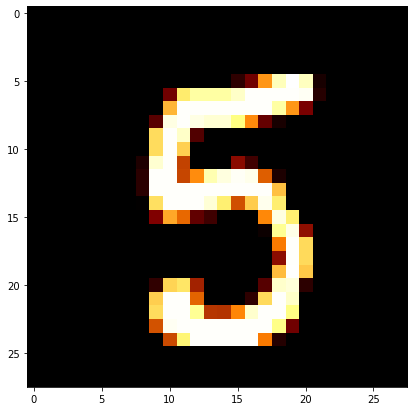

In [ ]:
test_data = test_data/255.0

image_show(test_data,10)

In [ ]:
def prediction(idx):
  plt.figure(figsize=(7,7))
  image= test_data.iloc[idx].to_numpy().reshape(1,28,28)
  p = model_v1.predict(image)
  return p

In [ ]:
p = prediction(9)
print("prediction {}".format(np.argmax(p)))

prediction 3


<Figure size 504x504 with 0 Axes>

Model Deployment of MNIST DATA set using streamlit library

In [ ]:
%%writefile app.py
import streamlit as st
import matplotlib.pyplot as plt
from keras.models import load_model
import tensorflow as tf
import numpy as np
import pandas as pd
model_v1 = tf.keras.models.load_model('saved_model/my_model')
test_data = pd.read_csv("test.csv")
def prediction(idx):
  idx = int(idx)
  plt.figure(figsize=(7,7))
  image= test_data.iloc[idx].to_numpy().reshape(1,28,28)
  p = model_v1.predict(image)
  return p
# this is main function which defines the web pages
def main():
   #front end element on web pages
   html_temp = """ 
   <div style ="background-color:yellow;padding:13px"> 
   <h1 style ="color:black;text-align:center;">Digit Recogintion</h1> 
   </div> 
   """
   # display the front end aspect
   st.markdown(html_temp, unsafe_allow_html = True) 
   idx = st.number_input("Enter the MNIST image index")
   result= " "
   if st.button("Predict"):
     result = prediction(idx)
     st.success("MNIST digit Recogintion based on entered image's index =  {}".format(np.argmax(result)))
if __name__=='__main__': 
    main()

Overwriting app.py


In [ ]:
!streamlit run app.py &>/dev/null&

In [ ]:
!ngrok authtoken 24QK9tsxhgVhAIssPQhPrFNQSWg_3j6PtXWiKHCUnCtXn6BbG

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
from pyngrok import ngrok
public_url = ngrok.connect('8501')
public_url

INFO:pyngrok.ngrok:Opening tunnel named: http-8501-6a1477c9-ea55-4714-b1d7-68b961dd0ea7
2022-09-12 19:03:11.716 INFO    pyngrok.ngrok: Opening tunnel named: http-8501-6a1477c9-ea55-4714-b1d7-68b961dd0ea7
INFO:pyngrok.process.ngrok:t=2022-09-12T19:03:11+0000 lvl=info msg="no configuration paths supplied"
2022-09-12 19:03:11.860 INFO    pyngrok.process.ngrok: t=2022-09-12T19:03:11+0000 lvl=info msg="no configuration paths supplied"
INFO:pyngrok.process.ngrok:t=2022-09-12T19:03:11+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
2022-09-12 19:03:11.868 INFO    pyngrok.process.ngrok: t=2022-09-12T19:03:11+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
INFO:pyngrok.process.ngrok:t=2022-09-12T19:03:11+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
2022-09-12 19:03:11.876 INFO    pyngrok.process.ngrok: t=2022-09-12T19:03:11+0000 lvl=info msg="open config file" path=/root/.ngrok2/

<NgrokTunnel: "http://58b0-34-138-217-149.ngrok.io" -> "http://localhost:8501">

INFO:pyngrok.process.ngrok:t=2022-09-12T19:03:12+0000 lvl=info msg="started tunnel" obj=tunnels name=http-8501-6a1477c9-ea55-4714-b1d7-68b961dd0ea7 addr=http://localhost:8501 url=https://58b0-34-138-217-149.ngrok.io
2022-09-12 19:03:12.167 INFO    pyngrok.process.ngrok: t=2022-09-12T19:03:12+0000 lvl=info msg="started tunnel" obj=tunnels name=http-8501-6a1477c9-ea55-4714-b1d7-68b961dd0ea7 addr=http://localhost:8501 url=https://58b0-34-138-217-149.ngrok.io
INFO:pyngrok.process.ngrok:t=2022-09-12T19:03:12+0000 lvl=info msg=end pg=/api/tunnels id=c49770216db854d3 status=201 dur=90.402484ms
2022-09-12 19:03:12.176 INFO    pyngrok.process.ngrok: t=2022-09-12T19:03:12+0000 lvl=info msg=end pg=/api/tunnels id=c49770216db854d3 status=201 dur=90.402484ms
